<a href="https://colab.research.google.com/github/MouadEttali/Machine-Learning-Study-/blob/main/trying_dbscan_and_plotly.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('/content/sample_data/california_housing_train.csv')
df

In [4]:
plt.style.use('ggplot')

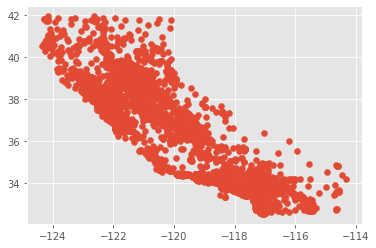

In [5]:
lat_long = df[['latitude','longitude']]
lat , longg = lat_long.latitude , lat_long.longitude

plt.scatter(longg, lat)


In [7]:
from sklearn.cluster import DBSCAN

X = lat_long.to_numpy()
db_cluster_model = DBSCAN().fit(X)
db_cluster_model.labels_


array([0, 0, 1, ..., 1, 1, 1])

In [8]:
df['cluster'] =  db_cluster_model.labels_
df['cluster'].value_counts()

In [11]:
import plotly.express as px
fig = px.scatter(x=longg, y = lat, color = df['cluster'])
fig.show()

In [12]:
from sklearn.metrics import silhouette_score as ss

ss(X,df['cluster'])

0.2589526181957224

In [13]:
db_cluster_model = DBSCAN(eps=0.2,min_samples=15).fit(X)
df['cluster'] =  db_cluster_model.labels_
df['cluster'].value_counts()

 2    9065
 4    6999
-1     401
 7     219
 9      95
 0      84
 6      77
 3      21
 5      18
 1      15
 8       6
Name: cluster, dtype: int64

In [14]:
fig = px.scatter(x=longg, y = lat, color = df['cluster'])
fig.show()

In [15]:
epsilons = np.linspace(0.01,1,num=15)
min_samples = np.arange(2,20,step=3)

import itertools

combinations = list(itertools.product(epsilons, min_samples))
N = len(combinations)

In [16]:
def get_scores_and_labels(combinations, X):
  scores = []
  all_labels_list = []

  for i, (eps, num_samples) in enumerate(combinations):
    dbscan_cluster_model = DBSCAN(eps=eps, min_samples=num_samples).fit(X)
    labels = dbscan_cluster_model.labels_
    labels_set = set(labels)
    num_clusters = len(labels_set)
    if -1 in labels_set:
      num_clusters -= 1
    
    if (num_clusters < 2) or (num_clusters > 50):
      scores.append(-10)
      all_labels_list.append('bad')
      c = (eps, num_samples)
      print(f"Combination {c} on iteration {i+1} of {N} has {num_clusters} clusters. Moving on")
      continue
    
    scores.append(ss(X, labels))
    all_labels_list.append(labels)
    print(f"Index: {i}, Score: {scores[-1]}, Labels: {all_labels_list[-1]}, NumClusters: {num_clusters}")

  best_index = np.argmax(scores)
  best_parameters = combinations[best_index]
  best_labels = all_labels_list[best_index]
  best_score = scores[best_index]

  return {'best_epsilon': best_parameters[0],
          'best_min_samples': best_parameters[1], 
          'best_labels': best_labels,
          'best_score': best_score}

best_dict = get_scores_and_labels(combinations, X)

Combination (0.01, 2) on iteration 1 of 90 has 2170 clusters. Moving on
Combination (0.01, 5) on iteration 2 of 90 has 945 clusters. Moving on
Combination (0.01, 8) on iteration 3 of 90 has 394 clusters. Moving on
Combination (0.01, 11) on iteration 4 of 90 has 179 clusters. Moving on
Combination (0.01, 14) on iteration 5 of 90 has 75 clusters. Moving on
Index: 5, Score: -0.7351371201118361, Labels: [-1 -1 -1 ... -1 -1 -1], NumClusters: 36
Combination (0.08071428571428571, 2) on iteration 7 of 90 has 130 clusters. Moving on
Combination (0.08071428571428571, 5) on iteration 8 of 90 has 70 clusters. Moving on
Combination (0.08071428571428571, 8) on iteration 9 of 90 has 54 clusters. Moving on
Index: 9, Score: 0.2241184716489065, Labels: [-1 -1 -1 ... -1 -1 -1], NumClusters: 50
Index: 10, Score: 0.23025110810727797, Labels: [-1 -1 -1 ... -1 -1 -1], NumClusters: 45
Index: 11, Score: 0.25576779449421544, Labels: [-1 -1 -1 ... -1 -1 -1], NumClusters: 40
Combination (0.15142857142857144, 2) o

In [17]:
df['cluster'] = best_dict['best_labels']

df['cluster'].value_counts()

 0    9417
 2    7221
-1     202
 4     103
 3      35
 1      22
Name: cluster, dtype: int64

In [18]:
fig = px.scatter(x=longg, y=lat, color=df['cluster'])
fig.show()

In [20]:
import plotly.io as pio
pio.templates

Templates configuration
-----------------------
    Default template: 'plotly'
    Available templates:
        ['ggplot2', 'seaborn', 'simple_white', 'plotly',
         'plotly_white', 'plotly_dark', 'presentation', 'xgridoff',
         'ygridoff', 'gridon', 'none']

In [21]:
for i in pio.templates:
  print(i)

ggplot2
seaborn
simple_white
plotly
plotly_white
plotly_dark
presentation
xgridoff
ygridoff
gridon
none


In [22]:
for template in pio.templates:
  fig = px.scatter(x=longg, y=lat, color=df['cluster'], template = template)
  fig.show()